In [2]:
import os

In [3]:
os.chdir("/home/matvey/data/LshCas13a_RNA_cleavage/tRNA_cleavage_analysis/")

In [4]:
tRNAs_aln = "Results/d10LVM_tRNA_subset.aln"

In [5]:
LRTables_dir = "Results/d10LVM_LRTable_tRNA_subsets/"

In [6]:
from Bio import AlignIO

In [7]:
AlnRecords = AlignIO.read(tRNAs_aln, format="fasta")

In [8]:
print(AlnRecords)

Alignment with 84 rows and 96 columns
-ggggcuauagcucagcugg-gagagcgccugcuuugcacg---...cca alaT
-ggggcuauagcucagcugg-gagagcgccugcuuugcacg---...cca alaU
-ggggcuauagcucagcugg-gagagcgccugcuuugcacg---...cca alaV
-ggggcuauagcucagcugg-gagagcgcuugcauggcaug---...cca alaW
-ggggcuauagcucagcugg-gagagcgcuugcauggcaug---...cca alaX
-gcauccguagcucagcuggauagaguacucggcuacgaac---...cca argQ
-gcgcccuuagcucaguuggauagagcaacgaccuucuaag---...cca argU
-gcauccguagcucagcuggauagaguacucggcuacgaac---...cca argV
-guccucuuaguuaaaugga-uauaacgagccccuccuaag---...cca argW
-gcgcccguagcucagcuggauagagcgcugcccuccggag---...cca argX
-gcauccguagcucagcuggauagaguacucggcuacgaac---...cca argY
-gcauccguagcucagcuggauagaguacucggcuacgaac---...cca argZ
-uccucuguaguucagucgg-uagaacggcggacuguuaau---...cca asnT
-uccucuguaguucagucgg-uagaacggcggacuguuaau---...cca asnU
-uccucuguaguucagucgg-uagaacggcggacuguuaau---...cca asnV
-uccucuguaguucagucgg-uagaacggcggacuguuaau---...cca asnW
-ggagcgguaguucagucgguuagaauaccugccugucacg---...cca aspT
-ggagcggua

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [10]:
PValues_record = list()
logFC_record = list()
for AlnRecord in AlnRecords:
    LRTable_subset = pd.read_csv(f"{LRTables_dir}{AlnRecord.name}.tsv", sep="\t")
    
    for i, letter in enumerate(AlnRecord.seq):
        if letter == "-":
            LRTable_subset.loc[LRTable_subset["RelPos"] >= i, "RelPos"] += 1
            
        if i not in LRTable_subset["RelPos"].tolist():
            new_row = pd.DataFrame([["NC_000913.3", i, "X", 0, 1]], 
                                   columns=["SeqID", "RelPos", "Strand", "logFC", "PValue.adj"])
            LRTable_subset = LRTable_subset.append(new_row, ignore_index=True)
            
    LRTable_subset.sort_values(by="RelPos", inplace=True)
    PValues_record.append(LRTable_subset["PValue.adj"].tolist())
    logFC_record.append(LRTable_subset["logFC"].tolist())

In [11]:
FDR_heatmap_data = np.array(PValues_record)
logFC_heatmap_data = np.array(logFC_record)

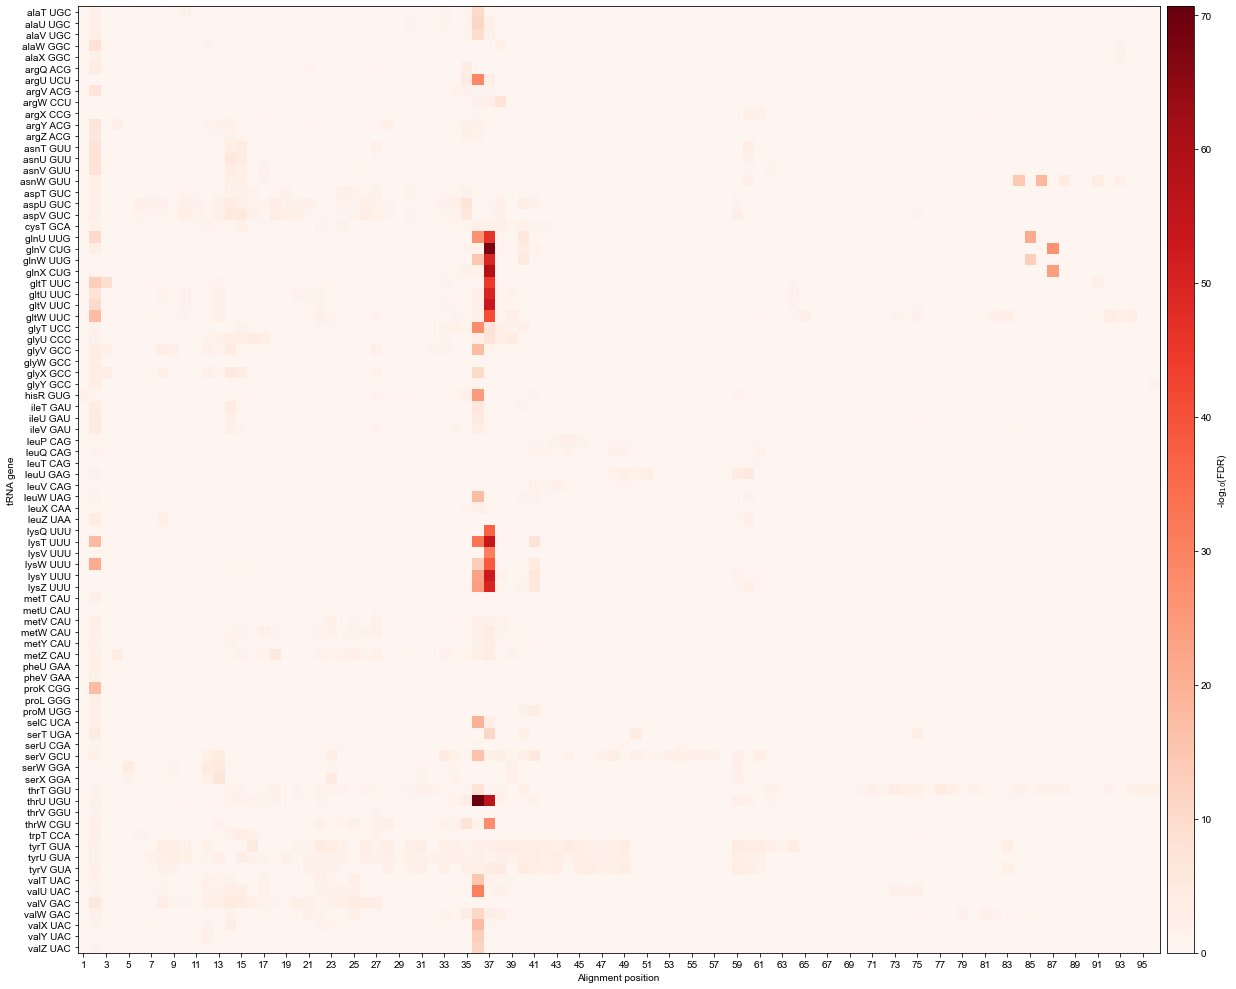

In [12]:
plt.rcParams['font.family'] = 'Arial'

figure = plt.figure(figsize=(20,30))

ax = figure.add_subplot()

im = ax.imshow(-np.log10(FDR_heatmap_data), cmap="Reds")

ax.set_yticks(np.arange(len(AlnRecords)))
ax.set_yticklabels([i.description for i in AlnRecords])

ax.set_xticks(np.arange(AlnRecords.get_alignment_length())[0::2])
ax.set_xticklabels([str(i+1) for i in range(AlnRecords.get_alignment_length())][0::2])

ax.set_ylabel("tRNA gene")
ax.set_xlabel("Alignment position")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.1)
   
cbar = plt.colorbar(im, cax=cax)
cbar.ax.set_ylabel("-log$_{10}$(FDR)")

figure.savefig("Results/Pictures/d10_tRNA_FDR_heatmap2.pdf", dpi=300)
figure.savefig("Results/Pictures/d10_tRNA_FDR_heatmap2.png", dpi=300)